
# Exploring the 2017 Thomas Fire's Environmental and Health Impacts

<img src="https://www.dailynews.com/wp-content/uploads/2017/12/1208_nws_ldn-l-thomas-fire-from-space11.jpg?w=1310" style="width:600px;"/>

Image credits: [LA Daily News](https://www.dailynews.com/2017/12/08/see-the-destruction-and-fury-of-venturas-thomas-fire-from-space/)

*Author: Haylee Oyler*

This project contains **two analyses** of the 2017 Thomas Fire in Santa Barbara and Ventura Counties.

-   **Part 1: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County** uses air quality index data to examine the change in air quality before and after the fire.

-   **Part 2: False Color Imagery of the 2017 Thomas Fire** uses geospatial Landsat and fire perimeter data to create a false color map of the residual fire scar.

Additional information can be found at [the GitHub repository](https://github.com/haylee360/thomas-fire-analysis) for this project.



# Part 1: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

### About

#### Purpose

Part one of this analysis explores the change in air quality in Santa Barbara county during the 2017 Thomas Fire. The Thomas Fire was one of the regions largest fires to date, burning over 280,000 acres in Ventura and Santa Barbara counties in December 2017. It caused widespread ecological damage, displaced communities, and left lasting environmental impacts. Additionally, wildfire smoke is a strong trigger for respiratory diseases such as asthma. One way to measure wildfire's environmental health effects is through air quality.

The air quality index (AQI) is a measure of how clean or polluted the air is and what associated health effects might be a concern. It is a scale that ranges from 0-500 with 0-50 being good, 151-200 being unhealth, and 301-500 being hazardous.

Part 1 will using AQI data to the explore the Thomas Fire's effects on air quality and environmental health in Santa Barbara County.

#### Highlights

-   Import AQI data using `pandas`
-   Explore and clean AQI data using `pandas`
-   Filter AQI data to Santa Barbara county during the Thomas Fire using `pandas`
-   Calculate a rolling 5 day average AQI using `pandas`
-   Visualize the AQI over time during the Thomas Fire using `matplotlib`

#### About the Data

This analysis uses data from the [Air Quality Index Daily Values Report](https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report) which provides daily AQI values for a specified year and location. We're working with two data sets `daily_aqi_by_county_2017` and `daily_aqi_by_county_2018`. These contain daily AQI values for U.S. counties in 2017 and 2018 respectively. The Thomas Fire occurred in December of 2017, so we've selected data before and after the fire to see a clear picture of its effect on air quality.

#### References

-   [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) from [US Environmental Protection Agency](https://www.epa.gov).

    -   US Environmental Protection Agency. Air Quality System Data Mart AirNow available via https://www.epa.gov/outdoor-air-quality-data. Accessed October 17 2024.

#### Acknowledgements

All materials were created by [Carmen Galaz-Garcia](https://github.com/carmengg) for [EDS-220: Working with Environmental Data](https://meds-eds-220.github.io/MEDS-eds-220-course/).

### Load Libraries
Before we begin our analysis, we'll start by loading all the necessary libraries for this project. 

In [1]:
# Import libraries
import os # To set file paths
import warnings
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.patches as mpatches # To create a custom legend

# Change display settings to see all column names
pd.set_option("display.max.columns", None)

## Import AQI data and explore
We'll start by importing our air quality index data for 2017 and 2018 and conducting a prelimnary exploration. 

In [2]:
# Read in AQI data for both years
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', 
                    compression = 'zip')

aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', 
                    compression = 'zip')

In [3]:
# View the first few rows of aqi 2017
aqi_17.head(3)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1


In [4]:
# View the first few rows of aqi 2018
aqi_18.head(3)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,42,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,45,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,20,Good,PM2.5,01-003-0010,1


In [5]:
# View unique defining paramters of the aqi data 
aqi_17['Defining Parameter'].unique()

array(['PM2.5', 'Ozone', 'NO2', 'PM10', 'CO'], dtype=object)

In [6]:
# View the info of the aqi data
aqi_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326801 entries, 0 to 326800
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 326801 non-null  object
 1   county Name                326801 non-null  object
 2   State Code                 326801 non-null  int64 
 3   County Code                326801 non-null  int64 
 4   Date                       326801 non-null  object
 5   AQI                        326801 non-null  int64 
 6   Category                   326801 non-null  object
 7   Defining Parameter         326801 non-null  object
 8   Defining Site              326801 non-null  object
 9   Number of Sites Reporting  326801 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.9+ MB


Our AQI data contains information about the state and county location, date, and air quality index. We can also see that the defining parameter of air pollution is either PM 2.5, ozone, NO2, PM10, or CO. Additionally, our AQI data has no missing values and 4 of our variables are type `int64` and 6 are type `object`. Something notable about these data types is that our `Date` column is not being recognized as a `datetime` object. We will fix this later on... 

## Clean the AQI data

Currently, our AQI data is housed in two separate data frames. We will join them together using the `pandas` function `pd.concat()` and save them as one data frame named `aqi`.

NOTE: When we concatenate data frames without any extra parameters specified in `pd.concat()`, the indices are simply stacked on top of one another. Therefore, the resuling index values of `aqi` will not match the length of the new data frame.

In [7]:
# Bind 2017 and 2018 AQI data together
aqi = pd.concat([aqi_17, aqi_18])
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327538,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327540,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327541,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


Notice that our data frame dimensions of 654344 rows by 10 columns do not match the last row index of 327542. To address our confusing index, we will change the index of our data frame to the date column.

First, we will ensure that our `Date` column is a `pandas` `datetime` object. Then, we will set our index to the `Date` column.

In [8]:
# Convert date to a datetime object
aqi.Date = pd.to_datetime(aqi.Date)

# Set the index to our datetime to make visualizing easier later on
aqi = aqi.set_index('Date')
aqi.head(3)

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
Date,,,,,,,,,
2017-01-01,Alabama,Baldwin,1,3,28,Good,PM2.5,01-003-0010,1
2017-01-04,Alabama,Baldwin,1,3,29,Good,PM2.5,01-003-0010,1
2017-01-10,Alabama,Baldwin,1,3,25,Good,PM2.5,01-003-0010,1


Next, we will clean the column names of our new data frame. We will make all the column names lower snake case via the operations below. Here is a step-by-step of what the functions do:

-   `aqi.columns = (aqi.columns` selects the columns from the `aqi` data frame and reassigns them to the original data frame
-   `.str.lower()` uses the string operator to make all the letters lower case
-   `.str.replace(' ','_')` converts the output of the lower case columns to a string and replaces all spaces with an underscore
-   `)` closes the method chaining
-   `print(aqi.columns, '\n')` lets us view the output of our modified column names

In [9]:
# Initial column names: notice caps and spaces
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



## Filter AQI data

For this specific analysis, we're only interested in the air quality Santa Barbara County. We will filter our data frame to Santa Barbara and drop columns with unnecessary information.

In [10]:
# Filter data to Santa Barbara county 
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

# Drop the columns we're not interested in working with
aqi_sb = aqi_sb.drop(['state_name', 'county_name', 'state_code', 'county_code'], axis=1)
aqi_sb.head(3)

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
Date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,39,Good,PM2.5,06-083-2011,11
2017-01-03,71,Moderate,PM10,06-083-4003,12


## AQI rolling average

In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

-   `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something.
-   in this example we use the aggregator function `mean()` to calculate the average over each window
-   the parameter '5D' indicates we want the window for our rolling average to be 5 days.
-   we get a `pandas.Series` as ouput

In [11]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling(window='5D').mean()

In [12]:
# Append our rolling average to our original data frame
aqi_sb['five_day_average'] = rolling_average

## Plot AQI during the Thomas Fire

Now that our data frame contains all the correct, necessary information, we can visualize it using `matplotlib`

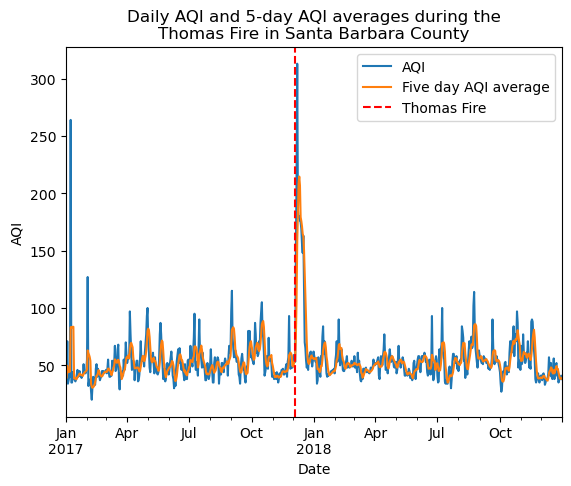

In [ ]:
# Initialize an empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Visualize air quality during the Thomas Fire
aqi_sb.aqi.plot(ax=ax, label = 'AQI') # daily aqi
aqi_sb.five_day_average.plot(ax=ax, label = "Five day AQI average") # five day average aqi

# Show the date of the Thomas fire
plt.axvline(x = '2017-12-04', 
            color = 'red', 
            linestyle = 'dashed', 
            label = "Thomas Fire")

# Customize the plot
ax.set_title('Daily AQI and 5-day AQI averages during the\nThomas Fire in Santa Barbara County')
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
ax.legend()

# Display the figure
plt.show()

This plot shows the drastic spike in AQI shortly after the thomas fire in December of 2017. The daily AQI peaks at just over 300, which is into the hazardous classification, and the five day average AQI is around 220, which is in the unhealthy classification. Widlfire's are known to release many harmful chemicals and particulates that contribute to worsening air quality. This in turn leads to worsening health outcomes for illnesses such as respiratory disease, heart disease, asthma, and more. 

# Part 2: False Color Imagery of the 2017 Thomas Fire

## About

#### Purpose

Part 2 of this analysis details the steps to visualize Landsat multispectral geospatial data for the 2017 Thomas Fire. The Thomas Fire, which burned over 280,000 acres in Ventura and Santa Barbara counties in December 2017, was one of California’s largest wildfires at the time. It caused widespread ecological damage, displaced communities, and left lasting environmental impacts.

False color imagery, created using satellite data from instruments like Landsat, is a useful tool for monitoring wildfire impacts. By assigning infrared bands to visible colors, these images highlight vegetation health, burn severity, and the extent of fire scars. This approach helps researchers and land managers assess recovery efforts, identify high-risk areas, and plan restoration strategies.

Part 2 will create a false color image of the Thomas Fire using remote sensing data, highlighting the fire scar and exploring how coding and data visualization support environmental monitoring.

#### Highlights

-   Import Thomas fire perimeter data with `geopandas` and `os`
-   Import Landsat data with `rioxarray` and `os`
-   Explore and clean geospatial data with `pandas` and `rioxarray`
-   Construct a true color image of the Thomas Fire with `matplotlib`
-   Construct a false color image of the Thomas Fire with `matplotlib`
-   Visualize the Thomas Fire false color scar with the fire perimeter data using `matplotlib`

#### About the Data

The Landsat data is a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmospherically corrected surface reflectance data, collected by the Landsat 8 satellite. It was pre-processed in the Microsoft Planetary data catalogue to remove data outside land and coarsen the spatial resolution

The Thomas Fire perimeter data comes from CalFire's data portal. CalFire is the department of forestry and fire protection. They have a Geodatabase of all historical fire perimeters in the state of California from 1878 until present. The database includes information on the fire date, managing agency, cause, acres, and the geospatial boundary of the fire, among other information. This data was pre-processed to select only the Thomas fire boundary geometry.

#### References

-   [Landsat Data](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) from Microsoft's Planetary Computer Data Catalogue.

    -   Earth Resources Observation and Science (EROS) Center. (2020). Landsat 4-5 Thematic Mapper Level-2, Collection 2. U.S. Geological Survey. https://doi.org/10.5066/P9IAXOVV
    -   Earth Resources Observation and Science (EROS) Center. (2020). Landsat 7 Enhanced Thematic Mapper Plus Level-2, Collection 2. U.S. Geological Survey. https://doi.org/10.5066/P9C7I13B
    -   Earth Resources Observation and Science (EROS) Center. (2020). Landsat 8-9 Operational Land Imager / Thermal Infrared Sensor Level-2, Collection 2. U.S. Geological Survey. https://doi.org/10.5066/P9OGBGM6

-   [CalFire Fire Perimeter Data](https://www.fire.ca.gov/what-we-do/fire-resource-assessment-program/fire-perimeters)

    -   California Department of Forestry and Fire Protection (CAL FIRE), \[calfire_all.gdb\], \[2024-11-17\], retrieved from [CAL FIRE data portal.](https://www.fire.ca.gov/what-we-do/fire-resource-assessment-program/fire-perimeters)

#### Acknowledgements

All materials were created by [Carmen Galaz-Garcia](https://github.com/carmengg) for [EDS-220: Working with Environmental Data](https://meds-eds-220.github.io/MEDS-eds-220-course/).

## Import geospatial data and explore

In [14]:
# Import landsat nc data
landsat = rioxr.open_rasterio(os.path.join('data',
                                    'landsat8-2018-01-26-sb-simplified.nc')
                                    )

# Import fire perimeter data
thomas_boundary = gpd.read_file(os.path.join('data',
                                    'thomas_boundary.geojson')
                                    )

/Users/hayleeoyler/miniforge3/envs/eds220-env/lib/python3.11/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/Users/hayleeoyler/miniforge3/envs/eds220-env/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/Users/hayleeoyler/miniforge3/envs/eds220-env/lib/python3.11/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/Users/hayleeoyler/miniforge3/envs/eds220-env/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotrans

In [15]:
# View the landsat data
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 0.5 1.5 2.5 3.5 4.5 ... 866.5 867.5 868.5 869.5
  * y            (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 727.5 728.5 729.5 730.5
    spatial_ref  int64 8B 0
Data variables:
    blue         (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    red          (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...
Attributes: (12/78)
    blue_add_offset:                               0
    blue_coordinates:                              time
    blue_grid_mapping:                             spatial_ref
    blue_scale_factor:                             1
    blue__FillValue:                               0
    blue__Netcdf4Coordinates:                      0 1
    ...                                            ...
    y_standard_name:                               projection_y_coordinate
    y_units:                                       metre
    y__FillValue:                                  nan
    y__Netcdf4Coordinates:                         0
    y__Netcdf4Dimid:                               0
    _NCProperties:                                 version=2,netcdf=4.9.2,hdf...

In [16]:
# Examine raster attributes using rio accessor
print('Height: ', landsat.rio.height)
print('Width: ', landsat.rio.width, '\n')

print('Spatial bounding box: ')
print(landsat.rio.bounds(), '\n')

print('CRS: ', landsat.rio.crs)

Height:  731
Width:  870 

Spatial bounding box: 
(0.0, 0.0, 870.0, 731.0) 

CRS:  None


#### Landsat data description

Our Landsat data contains the variables `red`, `green`, `blue`, `nir08`, and `swir22`. These are different bands of our lansat data. The dimensions of our data for each band are an (x,y) coordinate of projection of (870, 731). The CRS is EPSG: 32611 and the height and width of the data are 731 and 870. Each variable in our dataset contains the dimensions (band, y, x).

In [17]:
thomas_boundary.head()

,year,state,agency,unit_id,fire_name,inc_num,irwinid,alarm_date,cont_date,c_method,cause,objective,complex_name,complex_id,comments,fire_num,shape_length,shape_area,geometry
0,2017.0,CA,USF,VNC,THOMAS,00003583,,2017-12-04 00:00:00+00:00,2018-01-12 00:00:00+00:00,7.0,9.0,1.0,None,None,CONT_DATE based on Inciweb,None,445282.444798,1.140367e+09,"MULTIPOLYGON (((34867.386 -396856.457, 34819.3..."


In [18]:
thomas_boundary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          1 non-null      float64            
 1   state         1 non-null      object             
 2   agency        1 non-null      object             
 3   unit_id       1 non-null      object             
 4   fire_name     1 non-null      object             
 5   inc_num       1 non-null      object             
 6   irwinid       1 non-null      object             
 7   alarm_date    1 non-null      datetime64[ns, UTC]
 8   cont_date     1 non-null      datetime64[ns, UTC]
 9   c_method      1 non-null      float64            
 10  cause         1 non-null      float64            
 11  objective     1 non-null      float64            
 12  complex_name  0 non-null      object             
 13  complex_id    0 non-null      object             
 14  commen

In [19]:
thomas_boundary.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Fire perimeter data description

This fire perimeter data comes from CalFire and includes data for all fire perimeters from 1878 to 2023. It has data on the year, the fire name, the reporting agency, the cause, duration, among other data. The CRS is NAD83 California Albers and it is a projected CRS (EPSG:3310)

## Clean the Landsat data

In [20]:
# Remove the band dimension and variable
landsat = landsat.squeeze().drop_vars('band')

# Confirm it was removed correctly
landsat.dims

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731})

## Visualize the Thomas Fire with true color imagery

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


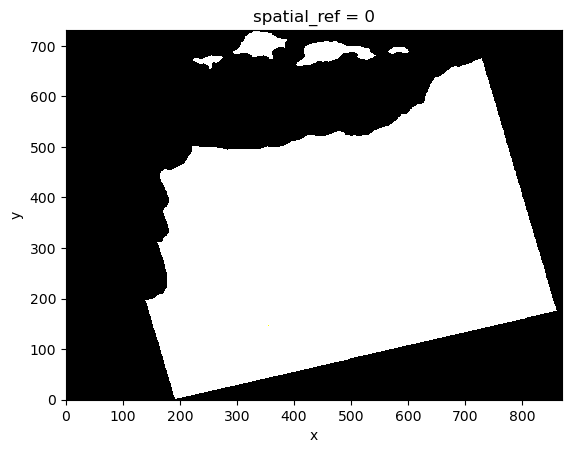

In [21]:
# First attempt to visualize the landsat data 
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

Our first attempt to map the data didn't go quite as planned. Let's true adjusting the `robust` parameter of `.imshow()` and see what happens

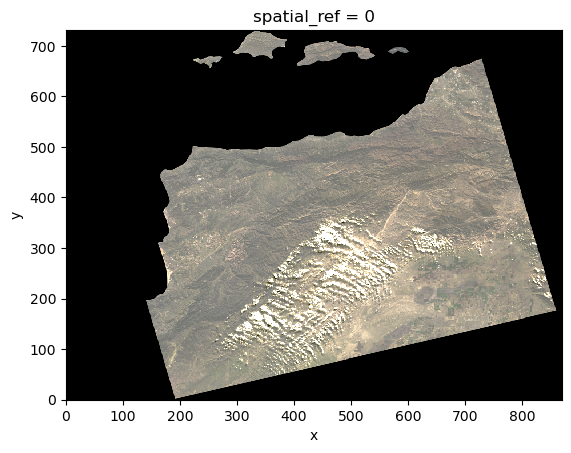

In [22]:
# Visualize the landsat data using true color imagery
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)

After we adjusted the scale for plotting the bands, we got a much more comprehensible image. The clouds were throwing off the scale for plotting. The `robust=True` argument allows us infer a different set vmin and vmax values to properly color the image. It takes out the 2nd and 98th percentile, removing outliers which makes it easier to visualize.

Next, we will use false color imagery to view the fire...

## Visualize the Thomas Fire with false color imagery
To make the Thomas Fire burn scar more visible, we will use false color imagery by assigning short-wave infrared radiation to red, near infrared to green, and red to blue.

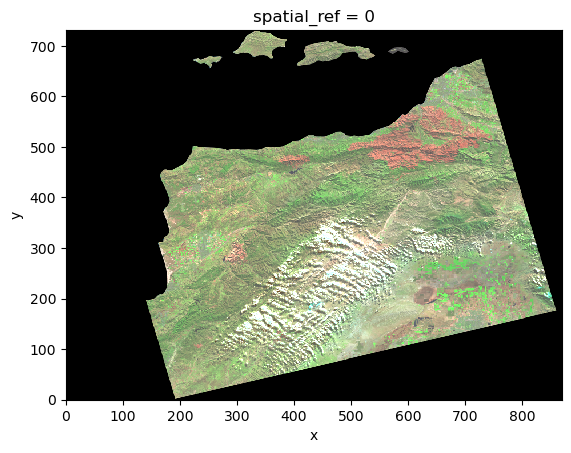

In [23]:
# Visualize the landsat data using false color imagery
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True)

## Map the Thomas Fire scar and boundary

In [ ]:
# Reproject data to match the CRS between our two datasets
thomas_boundary= thomas_boundary.to_crs("EPSG:4326")
landsat = landsat.rio.reproject("EPSG:4326")

# Confirm that the CRS of our data match
assert landsat.rio.crs == thomas_boundary.crs

MissingCRS: CRS not found. Please set the CRS with 'rio.write_crs()'. Data variable: blue

In [ ]:
# Initialize figure
fig, ax = plt.subplots()

# Plot the landsat data
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, 
                                                        robust = True)

# Plot the fire perimeter
thomas_boundary.boundary.plot(ax=ax, 
                            edgecolor='#f83c36', 
                            linewidth=2, 
                            label='Thomas Fire Boundary')

# Create a legend for the false color bands and boundary
legend_swir = mpatches.Patch(color = "#eb6a4b", label = 'Shortwave Infrared \n - Burned Area')
legend_nir = mpatches.Patch(color = "#a1fc81", label = 'Near Infrared \n - Vegetation')
legend_bound = mpatches.Patch(color = "#f83c36", label = 'Thomas Fire Boundary')

# Plot legend
ax.legend(handles = [legend_swir, legend_nir, legend_bound], bbox_to_anchor=(1.5,1), fontsize = 10)

# Set title and axes labels
ax.set_title('False Color Map of the 2017 Thomas Fire in California\nwith the Fire Perimeter',
            fontsize=14)
ax.set_xlabel('Longitude (degrees)')
ax.set_ylabel('Latitude (degrees)')

plt.show()

**Figure Description**

This map shows a false color image of the Thomas Fire in Santa Barbara and Ventura Counties. The fire boundary is outlined in red. Satellite data works with wavelengths of light beyond what the human eye can see. False color imagery is the process of assigning colors to these wavelengths (i.e. near-infrared and short-wave infrared). In our map, we've chosen to visualize short-wave infrared as red, near-infrared as green, and red wavelengths as blue. This lets us produce an image that highlights exactly where the fire scar is, as opposed to the true color image where you it is much harder to distinguish. A true color image assigns the red, green, and blue wavelengths of light to the correct corresponding colors.